🐕🐱 Dog vs Cat CNN Classifier
Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
            

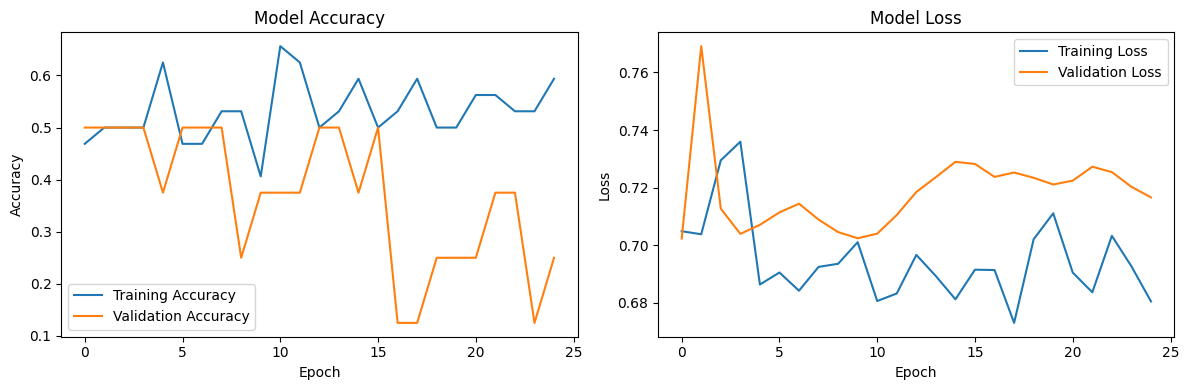

✅ Model saved as 'dog_cat_classifier.h5'


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


def create_data_generators():
    """Create data generators for training and validation"""
    

    train_datagen = ImageDataGenerator(
        rescale=1./255,              # Normalize pixel values
        rotation_range=20,           # Random rotation
        width_shift_range=0.2,       # Random horizontal shift
        height_shift_range=0.2,      # Random vertical shift
        horizontal_flip=True,        # Random horizontal flip
        validation_split=0.2         # Use 20% for validation
    )
    

    val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
    
    train_generator = train_datagen.flow_from_directory(
        '.',         
        target_size=(150, 150),     
        batch_size=32,
        class_mode='binary',         
        subset='training'
    )
    
    val_generator = val_datagen.flow_from_directory(
        '.',        
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation'
    )
    
    return train_generator, val_generator

def build_cnn_model():
    """Build a CNN model for dog vs cat classification"""
    
    model = models.Sequential([
      
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        
       
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        
        layers.Flatten(),
        
        
        layers.Dropout(0.5),         
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  
    ])
    
    return model

def train_model():
    """Complete training pipeline"""
    
             
    train_gen, val_gen = create_data_generators()
    
    
    model = build_cnn_model()
    
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    
    model.summary()
    
    
    history = model.fit(
        train_gen,
        epochs=25,
        validation_data=val_gen,
        verbose=1
    )
    
    return model, history


def plot_training_history(history):
    """Plot training and validation accuracy/loss"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


def predict_image(model, image_path):
    """Predict whether an image is a dog or cat"""
    
    from tensorflow.keras.preprocessing import image
    
    
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    
    prediction = model.predict(img_array)[0][0]
    
    if prediction > 0.5:
        return f"Dog (Confidence: {prediction:.2%})"
    else:
        return f"Cat (Confidence: {(1-prediction):.2%})"


if __name__ == "__main__":
    print("🐕🐱 Dog vs Cat CNN Classifier")
    print("=" * 40)
    
    
    model, history = train_model()
    
    
    plot_training_history(history)

    model.save('dog_cat_classifier.h5')
    print("✅ Model saved as 'dog_cat_classifier.h5'")
    
